In [28]:
# commons
import os

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Información preeliminar

Total passengers = 2224; Dead Passengers = 1502

There were some passenger more likely to survive than others.

The objective is to build a predictive model that answers the question: "What sorts of people were more likely to survive?"

# Obtenemos los datos

In [6]:
dir_actual = os.getcwd()
path_data = dir_actual + "\\data"
test_df = pd.read_csv(path_data+'\\test.csv')
train_df = pd.read_csv(path_data+'\\train.csv')

combined = [test_df,train_df]

In [7]:
print(test_df.info(),test_df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64


In [8]:
print(train_df.info(),train_df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int6

# Initial Questions

Which features are categorical?
- Survived, Sex, Embarked


Which features are numerical?
- Continous: Age, Fare
- Ordinal: Pclass


Which features are mixed data types?
- Ticket -> int + str + special characters


 Which features may contain errors or typos?
- Name


 Which features contain blank, null or empty values?
- Age, Cabin, Embarked

What are the data types for various features?
- PassengerId        -> int64
- Survived           -> int64
- Pclass             -> int64
- Name               -> object
- Sex                -> object
- Age                -> float6
- SibSp              -> int64
- Parch              -> int64
- Ticket             -> object
- Fare               -> float6
- Cabin              -> object
- Embarked           -> object

What is the distribution of numerical feature values across the samples?
- Total sample are 891 or 40% of the actual number of passengers on board (2224)
- Around 38% samples survived representative of the actual survival rate at 32%
- Most passengers (>75%) did not travel with parents or children
- Nearly 30% of the passengers had siblings and/or spouse abourd
- Fares varied significantly with few passengers (<1%) payings as high as 512$
- Few elderly (<1%) passengers within age range 65-80

In [9]:
# Train data

TOTAL_PASSENGERS = 2224
DEAD_PASSENGERS = 1502

print(train_df.describe())

rate_representative_data = round((train_df.shape[0] / TOTAL_PASSENGERS * 100),2)
print(f"\nPorcentaje muestra training dataset: {rate_representative_data} % -> {train_df.shape[0]}/{TOTAL_PASSENGERS}")

rate_actual_survived = round((1-DEAD_PASSENGERS/TOTAL_PASSENGERS)*100,2)
rate_train_survived = round(train_df['Survived'].mean()*100,2)
print(f"\nPorcentaje supervivencia original: {rate_actual_survived} %\nPorcentaje supervivencia train dataset:  {rate_train_survived} %")

percentage_fare_gt_50 = round(((train_df['Fare'] > 100).mean() * 100),2)
print(f"\nPasajeros que han pagado más de 100$: {percentage_fare_gt_50} %")



       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Porcentaje muestra training dataset: 40.06 % -> 891/2224

Porcentaje supervivenc

In [10]:
def plot_bar_distribution_fare():

    # Definir los intervalos
    inicio = 0
    fin = 550
    intervalo = 50
    bins = np.arange(inicio, fin+intervalo,intervalo).tolist()

    # Calcular la frecuencia en cada intervalo
    counts, _ = np.histogram(train_df['Fare'], bins=bins)

    # Calcular los porcentajes
    percentages = (counts / len(train_df['Fare'])) * 100
    
    # Graficar
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(percentages)), percentages, tick_label=[f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)])
    plt.xlabel('Fare Intervals')
    plt.ylabel('Percentage')
    plt.title('Distribución de Fare en Porcentajes por Intervalos')
    plt.xticks(rotation=45)
    plt.show()

In [11]:
def plot_bar_distributiona_age():
    # Definir los intervalos
    inicio = 0
    fin = 80
    intervalo = 5
    bins = np.arange(inicio, fin+intervalo,intervalo).tolist()

    # Calcular la frecuencia en cada intervalo
    counts, _ = np.histogram(train_df['Age'], bins=bins)

    # Calcular los porcentajes
    percentages = (counts / len(train_df['Age'])) * 100

    # Graficar
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(percentages)), percentages, tick_label=[f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)])
    plt.xlabel('Age Intervals')
    plt.ylabel('Percentage')
    plt.title('Distribución de Age en Porcentajes por Intervalos')
    plt.xticks(rotation=45)
    plt.show()

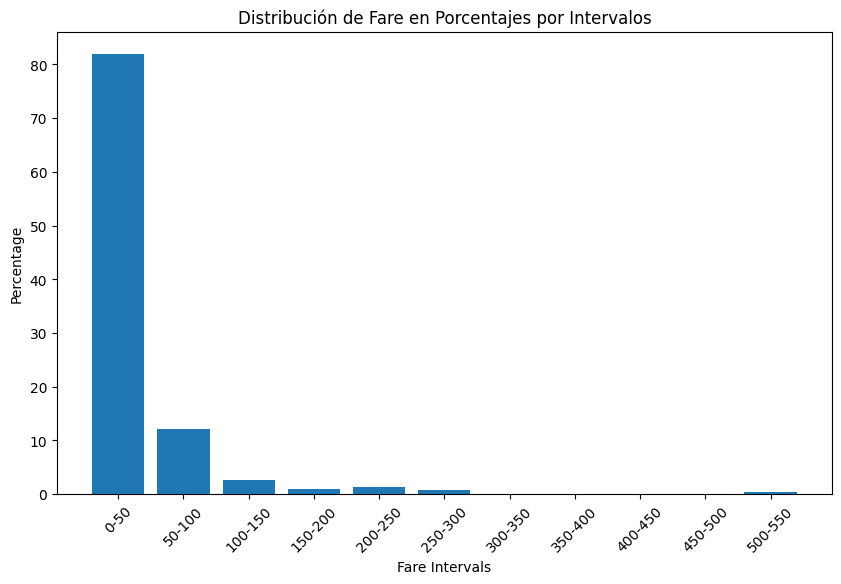

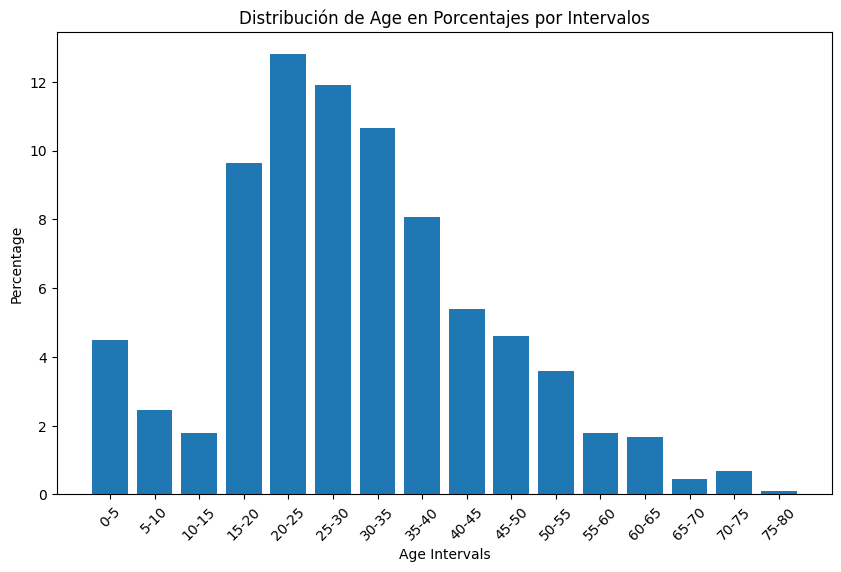

None None


In [12]:
print(plot_bar_distribution_fare(),plot_bar_distributiona_age())


What is the distribution of categorical features?
- Names are unique (count=unique=891)
- Sex variable as two possible values with 65% male (top=male, freq=577/count=891)
- Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin
- Embarked takes three possible values. S port used by most passengers (top=S)
- Ticket feature has high ratio (23%) of duplicate values (unique=681)


In [13]:
print(train_df.describe(include=['O']))

percentage_gender_train_dataset = round(((train_df['Sex'].value_counts(normalize=True) * 100).loc[['male', 'female']]),2)
print(f"\nDistribucion por genero: \n{percentage_gender_train_dataset}")
percentage_embarked_dataset = round(((train_df['Embarked'].value_counts(normalize=True) * 100).loc[['S', 'Q', 'C']]),2)
print(f"\nDistribución por puerta de embarque: \n{percentage_embarked_dataset}")
percentage_tickets_unique = round(train_df['Ticket'].nunique() / train_df['Ticket'].shape[0]*100, 2)
percentage_tickets_duplicate = round(100 - percentage_tickets_unique,2)
print(f"\nPorcentaje tickets únicos: {percentage_tickets_unique} %\nPorcentaje tickets duplicados: {percentage_tickets_duplicate} %")


                       Name   Sex  Ticket Cabin Embarked
count                   891   891     891   204      889
unique                  891     2     681   147        3
top     Dooley, Mr. Patrick  male  347082    G6        S
freq                      1   577       7     4      644

Distribucion por genero: 
Sex
male      64.76
female    35.24
Name: proportion, dtype: float64

Distribución por puerta de embarque: 
Embarked
S    72.44
Q     8.66
C    18.90
Name: proportion, dtype: float64

Porcentaje tickets únicos: 76.43 %
Porcentaje tickets duplicados: 23.57 %


# First Analysis Conclusion

Completing
1. We may want to complete Age feature as it is definetilye correlated to survival
2. We may want to complete the Embarked feature as it may also correlate with survival or another importan feature

Correcting
1. Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (23%) and there may not be a correlation between Ticket and survival
2. Cabin feature may be dropped as it is higly incomplete or contains many null values
3. PassengerID may be dropped from training dataset as it does not contribute to survival
4. Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped

Creating
1. We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
2. We may want to engineer the Name feature to extract Title as a new feature.
3. We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
4. We may also want to create a Fare range feature if it helps our analysis.

Classifying

We may also add to our assumptions based on the problem description noted earlier.

1. Women (Sex=female) were more likely to have survived.
2. Children (Age<?) were more likely to have survived.
3. The upper-class passengers (Pclass=1) were more likely to have survived

# Analyze by pivoting features

- Pclass -> We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
- Sex -> We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).
- SibSp and Parch -> These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

In [14]:
def pivoting(df: pd.DataFrame,columns: list):
    if isinstance(columns,list) and len(columns)>1:
        return df[columns].groupby(columns[0], as_index=False).mean().sort_values(by=columns[1], ascending=False)


In [15]:
print(pivoting(train_df,['Pclass', 'Survived']))

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [16]:
print(train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))


   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [17]:
print(train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [18]:
print(train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


In [19]:
print(train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


# Analyze by visualizing data

## Correlating numerical features

Observations about Age
- High survival rate for infants (Age < 5)
- Oldest person survive (Age = 80)
- Most passengers are in 15-35 range age
- Large number of 20-30 years old did not survive

Decisions
- We should consider Age (our assumption classifying #2) in our model training
- Complete the Age feature for null values (completing #1)
- We should band age groups (creating #3)

In [20]:
def plot_bar_distribution_age_by_survived():
    # Filtrar el DataFrame para obtener las edades de los que sobrevivieron y los que no
    survived_ages = train_df[train_df['Survived'] == 1]['Age']
    not_survived_ages = train_df[train_df['Survived'] == 0]['Age']

    # Definir los intervalos para el histograma
    bins = range(0, 81, 5)  # Intervalos de 5 años desde 0 hasta 80

    # Graficar los histogramas superpuestos
    plt.figure(figsize=(10, 6))
    sns.histplot(survived_ages, bins=bins, color='blue', alpha=0.5, label='Survived')
    sns.histplot(not_survived_ages, bins=bins, color='red', alpha=0.5, label='Not Survived')

    # Añadir etiquetas y leyenda
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.title('Distribution of Age by Survived')
    plt.legend()

    # Mostrar el gráfico
    plt.show()

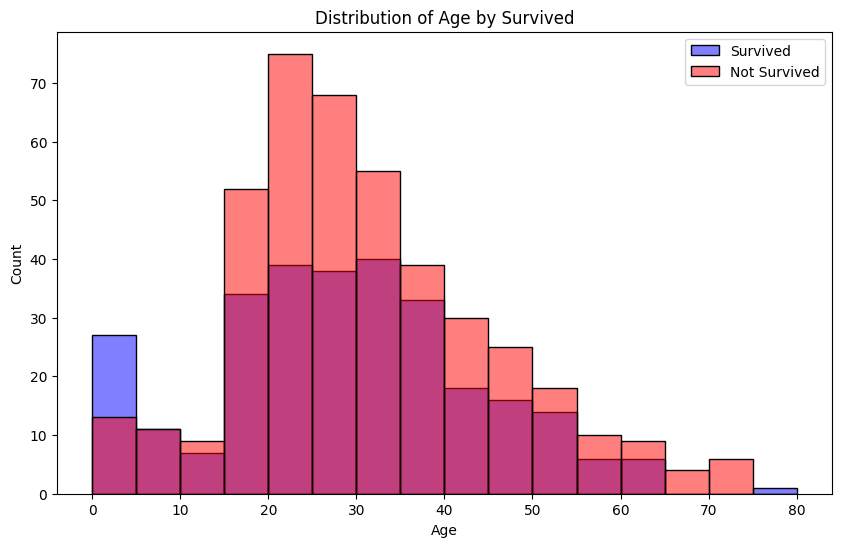

None


In [21]:
print(plot_bar_distribution_age_by_survived())

## Correlating numerical and ordinal features

Observations

- Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2
- Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2
- Most passengers in Pclass=1 survived. Confirms our classifying assumption #3
- Pclass varies in terms of Age distribution of passengers

Decisions

- Consider Pclass for model training

In [22]:
def plot_bar_distribution_pclass_by_survived():
    grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
    grid.map(plt.hist, 'Age', alpha=.5, bins=20)
    grid.add_legend();

None


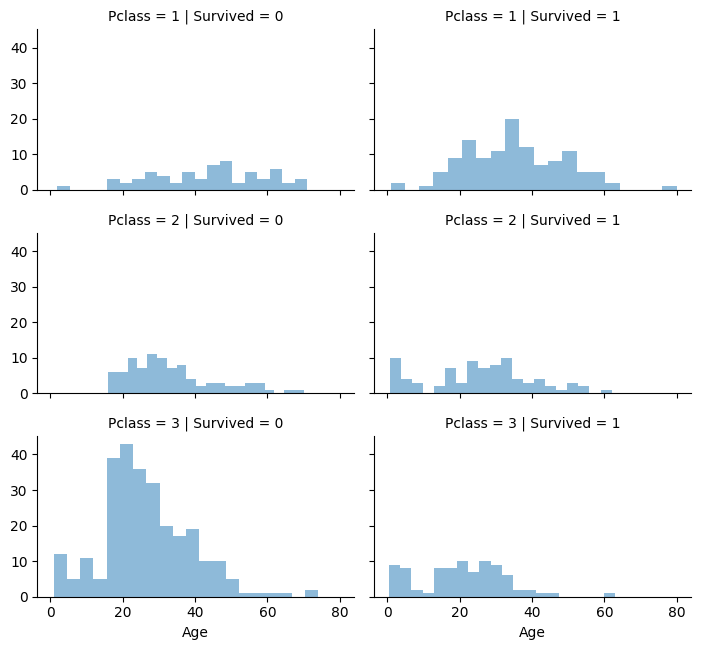

In [23]:
print(plot_bar_distribution_pclass_by_survived())

## Correlating categorical features

Observations
- Female passengers had much better survival rate than males. Confirms classifying (#1)
- Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between
- Embarked and Survived
- Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2)
- Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1)

Decisions

- Add Sex feature to model training
- Complete and add Embarked feature to model training

In [24]:
def plot_conditional_point_by_embarked_pclass_survived():
    # Definir el orden deseado para 'Pclass' y 'Sex'
    pclass_order = sorted(train_df['Pclass'].unique())
    sex_order = sorted(train_df['Sex'].unique())

    # Crear FacetGrid con filas basadas en 'Embarked'
    grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)

    # Mapear pointplot con 'Pclass' en el eje x, 'Survived' en el eje y y 'Sex' como variable categórica
    grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order=pclass_order, hue_order=sex_order)

    # Añadir leyenda
    grid.add_legend()

    # Mostrar el gráfico
    plt.show()

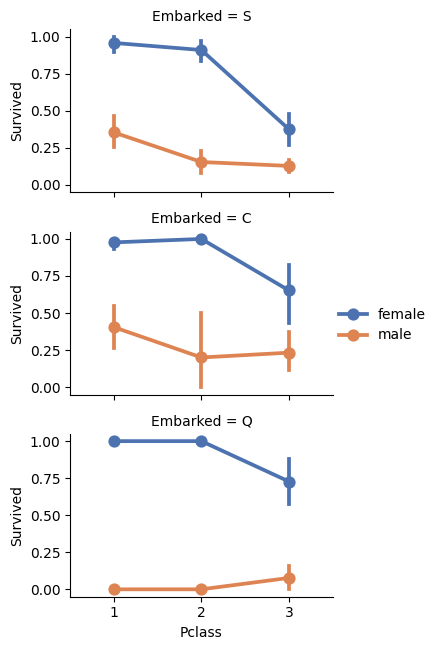

None


In [25]:
print(plot_conditional_point_by_embarked_pclass_survived())

## Correlating categorial and numerical features

Observations

- Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges
- Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2)

Decisions

- Consider banding Fare feature

In [26]:
def plot_bar_fare_by_embarked_and_survived():
    # Crear FacetGrid con filas basadas en 'Embarked' y columnas basadas en 'Survived'
    grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)

    # Mapear barplot con 'Sex' en el eje x, 'Fare' en el eje y
    grid.map(sns.barplot, 'Sex', 'Fare', alpha=0.5, order=['male', 'female'], err_kws={'color': '.2', 'linewidth': 2})

    # Añadir leyenda
    grid.add_legend()

    # Mostrar el gráfico
    plt.show()

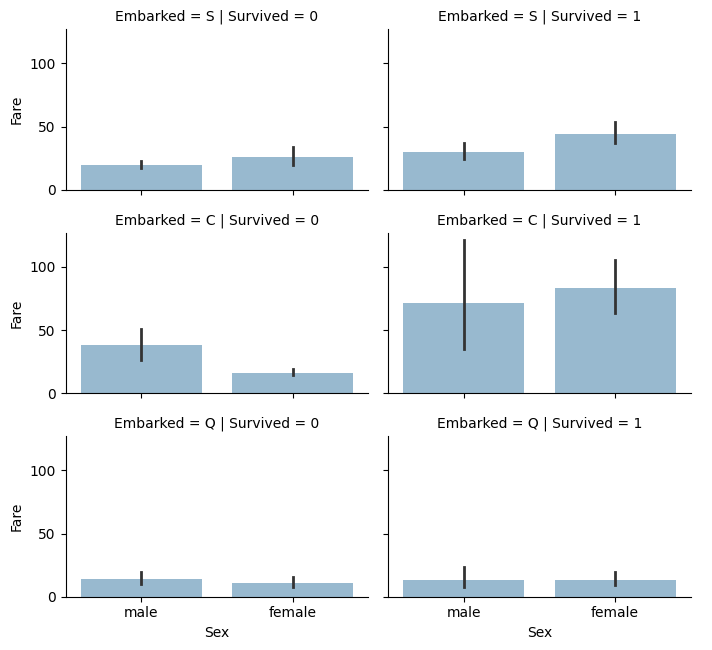

None


In [27]:
print(plot_bar_fare_by_embarked_and_survived())